In [66]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [67]:
headers = [
  "Label", "Alchohol", "Malic Acid", "Ash",
  "Alcalinity of Ash", "Magnesium", "Total Phenols",
  "Flavanoids", "Nonflavanoid Phenols", "Proanthocyanins",
  "Color Intensity", "Hue", "OD280/OD315 of Diluted Wines", "Proline"
]
df = pd.read_csv("../data/HW2/wine.data", names=headers)

In [68]:
y = np.array(df["Label"], dtype=np.float32)
X = np.array(df.iloc[:,1:], dtype=np.float32)
print(X.shape, y.shape)

(178, 13) (178,)


In [69]:
def Euclid(x, y):
  return np.sum(np.square(y - x))

def NN(dist_fn, X, y, query):
  idx = np.argmin([dist_fn(r, query) for r in X])
  return y[idx]

def K_Fold_CV(X, y, k):
  n = len(y)
  errs = []
  conf_data = []
  for i in range(k):
    lo, hi = (i * n) // k, ((i + 1) * n) // k
    hold_X, hold_y = X[lo:hi], y[lo:hi]
    tr_X, tr_y = np.vstack((X[:lo,:], X[hi:,:])), np.hstack((y[:lo], y[hi:]))

    preds = [NN(Euclid, tr_X, tr_y, query) for query in hold_X]

    if k == n:
      conf_data.append((preds[0], hold_y.item()))

    mismatch = np.not_equal(preds, hold_y)
    err = np.sum(mismatch) / len(mismatch)
    errs.append(err)
  
  if k == n:
    return np.mean(errs), conf_data
  else:
    return np.mean(errs)

# 11a,b

In [70]:
def Do_LOOCV(X, y):
  err, conf_data = K_Fold_CV(X, y, len(y))

  conf_mat = np.zeros((3, 3))
  for pred, lab in conf_data:
    conf_mat[int(pred)-1,int(lab)-1] += 1
  return conf_mat, err

conf_mat, err = Do_LOOCV(X, y)
print(f"=== Accuracy")
print(1 - err)
print("=== Confusion Matrix")
print(conf_mat)

=== Accuracy
0.7696629213483146
=== Confusion Matrix
[[52.  5.  3.]
 [ 3. 54. 14.]
 [ 4. 12. 31.]]


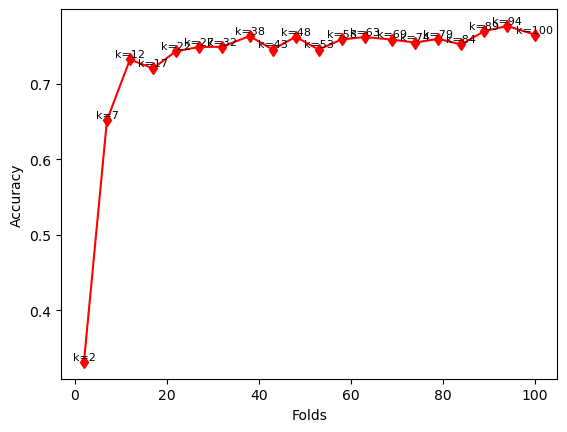

=== Best
k=94, acc=0.7765957446808511


In [75]:
folds = np.linspace(2, 100, 20).astype(np.int32)
err = [1 - K_Fold_CV(X, y, fold) for fold in folds]

plt.plot(folds, err, "-dr")
plt.ylabel("Accuracy")
plt.xlabel("Folds")
for f, e in zip(folds, err):
  plt.annotate(f"k={f}", (f, e), ha="center", va="bottom", fontsize=8)
plt.show()

best = np.argmax(err)
print("=== Best")
print(f"k={folds[best]}, acc={err[best]}")

# 11c

In [72]:
ranges = np.max(X, axis=0, keepdims=True) - np.min(X, axis=0, keepdims=True)
X2 = (X - np.min(X, axis=0, keepdims=True)) / ranges

In [77]:
conf_mat, err = Do_LOOCV(X2, y)
print(f"=== Accuracy")
print(1 - err)
print("=== Confusion Matrix")
print(conf_mat)

print("The Normaliation helped a significant amount, increasing accuracy from 0.770 to 0.949")

=== Accuracy
0.949438202247191
=== Confusion Matrix
[[59.  5.  0.]
 [ 0. 62.  0.]
 [ 0.  4. 48.]]
The Normaliation helped a significant amount, increasing accuracy from 0.770 to 0.949


# 12